<a href="https://colab.research.google.com/github/SanthoshPravin2546/About-machine-learning/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [67]:
car = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [68]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [69]:
car.shape

(4340, 8)

In [70]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [71]:
print(car.fuel.value_counts())
print(car.seller_type.value_counts())
print(car.transmission.value_counts())
print(car.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [72]:
car.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
car.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
car.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)
car.replace({'owner':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}}, inplace=True)

In [73]:
X = car.drop(['name','selling_price'], axis=1)
Y = car['selling_price']

In [74]:
print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      1
1     2007      50000     1            0             0      1
2     2012     100000     0            0             0      1
3     2017      46000     1            0             0      1
4     2014     141000     0            0             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      2
4336  2014      80000     0            0             0      2
4337  2009      83000     1            0             0      2
4338  2016      90000     0            0             0      1
4339  2016      40000     1            0             0      1

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

JUST A COMPARISON BETWEEN LINEAR REGRESSION AND LASSO REGRESSION METHODS

In [76]:
#LINEAR_REGRESSION
lreg_model= LinearRegression()
lreg_model.fit(X_train, Y_train)

LinearRegression()

In [77]:
training_prediction = lreg_model.predict(X_train)
#R 2 squared error
err_1= metrics.r2_score(Y_train, training_prediction)

In [78]:
print('R2 squared error is: ',err_1)

R2 squared error is:  0.4432687860960982


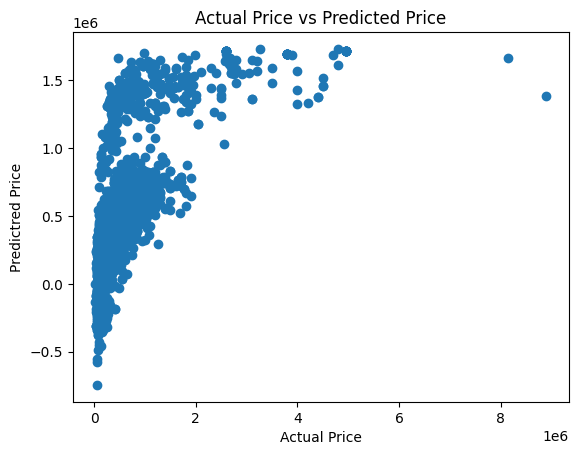

In [79]:
plt.scatter(Y_train, training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictred Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [80]:
testing_prediction = lreg_model.predict(X_test)
#R 2 squared error
err2 = metrics.r2_score(Y_test, testing_prediction)

In [81]:
print('R2 squared error is: ',err2)

R2 squared error is:  0.5219097394754668


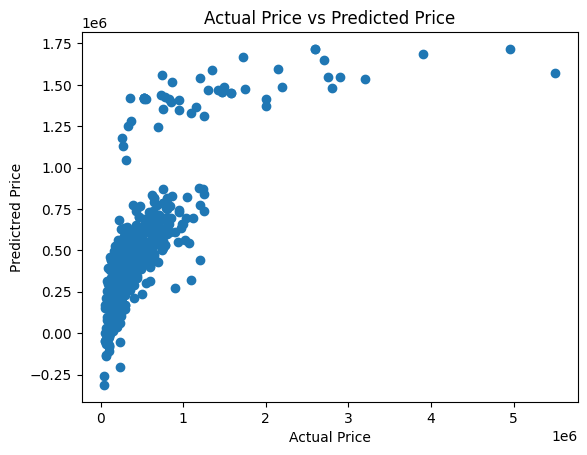

In [82]:
plt.scatter(Y_test, testing_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictred Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [83]:
#LASSO_REGRESSION
lassoreg_model= Lasso()
lassoreg_model.fit(X_train, Y_train)

Lasso()

In [84]:
training_prediction = lassoreg_model.predict(X_train)
#R 2 squared error
err3 = metrics.r2_score(Y_train, training_prediction)

In [85]:
print('R2 squared error is: ',err3)

R2 squared error is:  0.44326878604387243


In [86]:
testing_prediction = lassoreg_model.predict(X_test)
#R 2 squared error
err4 = metrics.r2_score(Y_test, testing_prediction)

In [87]:
print('R2 squared error is: ',err4)

R2 squared error is:  0.5219089629563558


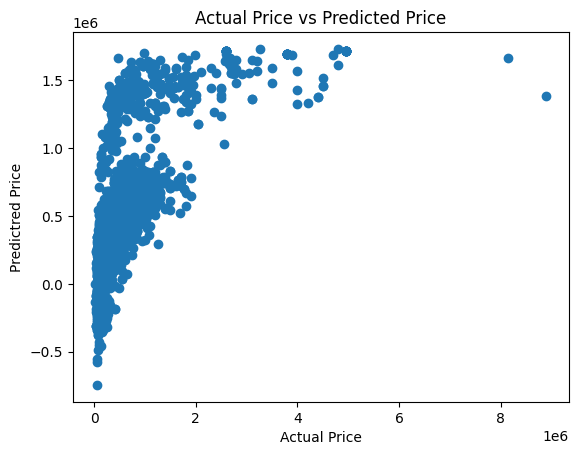

In [88]:
plt.scatter(Y_train, training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictred Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

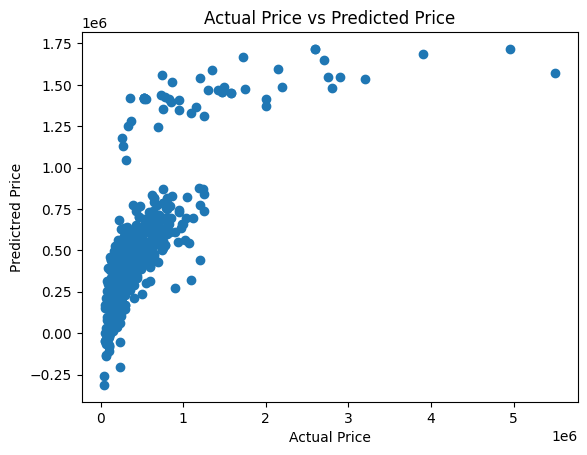

In [89]:
plt.scatter(Y_test, testing_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictred Price')
plt.title('Actual Price vs Predicted Price')
plt.show()